In [1]:
library(psych)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


In [7]:
#read in the data
df = read.csv("../data/example.dat", header = T)

In [4]:
#recode the reverse coded items
df_recd = df %>%
    mutate_at(vars(A1, A4:A6), list(~6 - .))

In [5]:
head(df, 10)
head(df_recd, 10)

C1,C2,C3,C4,C5,C6,A1,A2,A3,A4,A5,A6
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,2,4,4,4,4,4,4,3,2,2,2
3,3,4,3,3,4,3,4,4,2,4,2
4,2,2,2,4,2,2,4,4,2,2,2
2,2,3,4,4,3,2,4,3,4,2,4
4,2,4,1,2,4,1,4,4,3,3,1
4,2,2,4,4,2,4,4,2,4,2,4
4,2,4,4,4,2,3,4,4,2,2,2
2,3,5,2,5,4,2,5,4,2,1,2
4,4,4,1,2,4,2,4,4,2,2,2


C1,C2,C3,C4,C5,C6,A1,A2,A3,A4,A5,A6
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
3,2,4,4,4,4,2,4,3,4,4,4
3,3,4,3,3,4,3,4,4,4,2,4
4,2,2,2,4,2,4,4,4,4,4,4
2,2,3,4,4,3,4,4,3,2,4,2
4,2,4,1,2,4,5,4,4,3,3,5
4,2,2,4,4,2,2,4,2,2,4,2
4,2,4,4,4,2,3,4,4,4,4,4
2,3,5,2,5,4,4,5,4,4,5,4
4,4,4,1,2,4,4,4,4,4,4,4


In [38]:
#lets try some if statements
age = 25

if (age < 25) {
    print("Youngin'")
} else if (age > 25) {
    print("Wise")
} else if (age == 25) {
    print("Perfect timing!!")
} else {
    print("Unborn")
}

[1] "Perfect timing!!"


# Sampling Error of Correlations


In [39]:
corrData = NULL #containing of correlations

n = 50 
for (i in 1:1000){
    r1 = rnorm(mean = 0, sd = 1, n)
    r2 = rnorm(mean = 0, sd = 1, n)
    
    c = cor(r1, r2)
    #print(c)
    
    corrData = append(corrData, c)
}

In [40]:
describe(corrData)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1000,0.003971263,0.1408262,-0.00114793,0.001755687,0.143558,-0.4459887,0.5037802,0.9497689,0.1152245,0.08580415,0.004453316


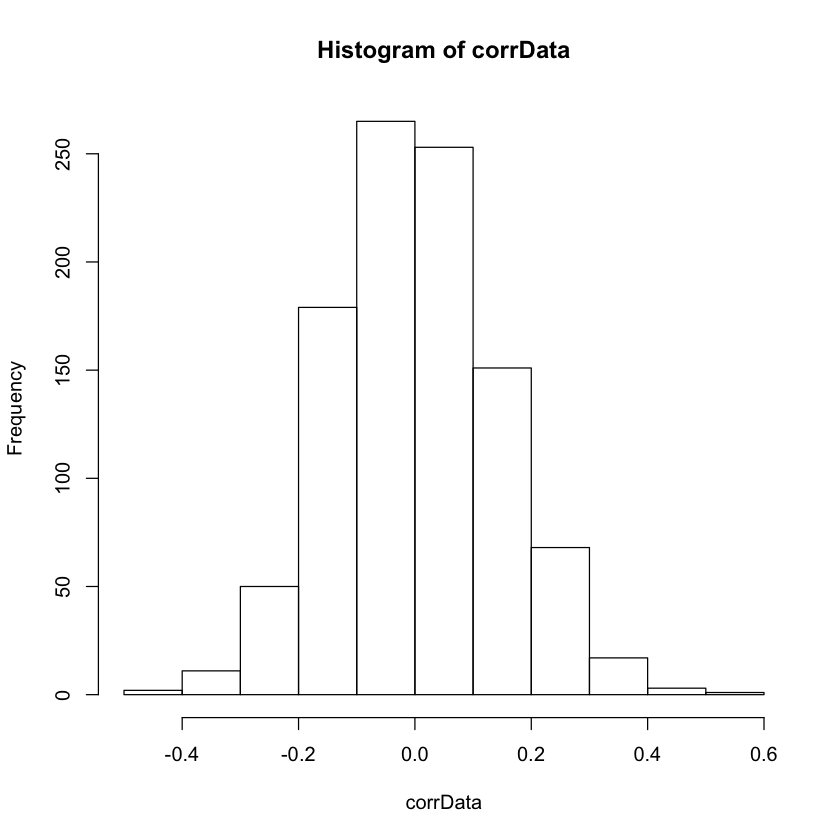

In [48]:
hist(corrData)

In [45]:
#get critical value when rho = 0
sorted = sort(corrData)
my_position = length(sorted) * .95 #95th percentile position in array
critical_value = sorted[my_position]; critical_value

[1] 0.2436296